<a href="https://colab.research.google.com/github/aleenamalik11/365-Days-Code-Learning/blob/master/Train_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Class1:
  def m(self):
    print("In Class1")
class Class2(Class1):
  def m(self):
    print("In Class2")

class Class3(Class1):
  def m(self):
    print("In Class3")
class Class4(Class2, Class3):
  pass
Class4().m()
Class4.mro()

In Class2


[__main__.Class4, __main__.Class2, __main__.Class3, __main__.Class1, object]

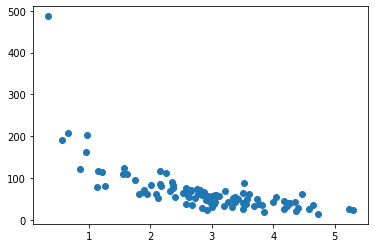

In [1]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

In [2]:
print(x)

[2.58324215 2.94373317 0.8638039  4.64027081 1.20656441 2.15825263
 3.50288142 1.75471191 1.94204778 2.09099239 3.55145404 5.29220801
 3.04153939 1.88207455 3.53905832 2.4038403  2.9808695  4.17500122
 2.25212905 3.00902525 2.12189211 2.84356583 3.25657045 2.01122095
 2.66117803 2.76381597 2.36234499 1.81238771 1.57878277 2.8465048
 2.73094304 5.23136679 0.56523242 3.1127265  3.37044454 4.35963386
 3.50185721 2.1557863  3.00000976 3.54235257 2.6864918  3.77101174
 1.13190935 4.73118467 4.46767801 2.66432266 3.61134078 3.04797059
 2.17086471 3.08771022 4.00036589 2.61890748 2.62433058 2.92552924
 3.43349633 4.27837923 2.36532069 3.50839624 3.21611601 1.14138761
 2.58068352 2.8676711  2.96042976 3.32600343 0.95967695 3.04625552
 2.32232442 1.56056097 3.52429643 3.73527958 2.34674973 3.84245628
 2.61848352 3.06648901 1.90126105 4.58448706 0.34055054 2.90854738
 3.69511961 0.96653345 2.81053074 2.92278133 3.82470301 4.24821292
 2.59610773 1.61548133 4.36723542 4.21788563 2.53799465 3.35088

In [3]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:] 

In [4]:
from sklearn.datasets import load_iris

In [5]:
data = load_iris()

In [18]:
print(data['data'][1])
print(data['target'])

import pandas as pd
iris_df = pd.DataFrame(data= numpy.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

[4.9 3.  1.4 0.2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [24]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

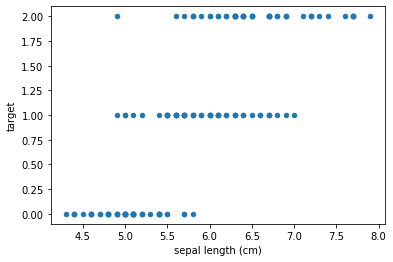

In [28]:
iris_df.plot(x='sepal length (cm)', y='target', kind='scatter')	

In [37]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y = iris_df['target']

In [39]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=.25, random_state=0)

print('Training set length: {}.\nTest set length: {}'.format(train_x.shape[0], test_x.shape[0]))

Training set length: 112.
Test set length: 38


In [41]:
train_x.shape

(112, 4)

In [43]:
from sklearn.preprocessing import StandardScaler

#from each value subtract its average and divide by the standard deviation
sc = StandardScaler()
sc.fit(train_x)

X_train_std = sc.transform(train_x)
X_test_std = sc.transform(test_x)

In [44]:
print(pd.DataFrame(X_train_std, columns=X.columns).head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.015440         -0.119255           0.225127          0.355798
1          -0.099845         -1.040395           0.113560         -0.029841
2           1.053005         -0.119255           0.950314          1.127075
3          -1.367980          0.341315          -1.392599         -1.315303
4           1.168290          0.111030           0.727180          1.384168


In [45]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True, random_state=0) 
#svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=10.0) #'rbf' is Radial Basis Function
#svm = SVC(kernel='poly', random_state=0, gamma=.5, C=500.0)
#Overfitting:
#svm = SVC(kernel='rbf', probability=True, random_state=0, gamma=.91, C=111.0)
svm.fit(X_train_std, train_y)

print('The accuracy on training data is {:.1f}%'.format(svm.score(X_train_std, train_y) * 100))
print('The accuracy on test data is {:.1f}%'.format(svm.score(X_test_std, test_y) * 100))

The accuracy on training data is 97.3%
The accuracy on test data is 97.4%


In [47]:
y_svm_test_predict = svm.predict(X_test_std)
print(y_svm_test_predict)

y_svm_train_predict_proba = svm.predict_proba(X_train_std)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_svm_test_predict)
cm

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.]


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])